# **Import libaries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    #Statistical data visualization.
import statsmodels.api as sm  #Performing advanced statistical tests and creating statistical models.
from sklearn.model_selection import train_test_split  # Implementing machine learning algorithms, model evaluation, and performance metrics.


#Models ML
from sklearn.svm import SVC     #support vector classification
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
data= pd.read_csv("USA_cars_datasets.csv")
data

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


# **Data Cleaning and Preprocessing**


In [3]:
data.isnull().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [4]:
#data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
#Alternative

data.drop('Unnamed: 0',axis=1, inplace= True)

In [5]:
data.drop(["lot","vin"],axis=1,inplace=True)
data.head()


,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,usa,22 hours left


In [6]:
data.drop(['country'],axis=1, inplace= True)

In [7]:
data['title_status'].value_counts()


title_status
clean vehicle        2336
salvage insurance     163
Name: count, dtype: int64

In [8]:
data['brand'].value_counts()

brand
ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
infiniti             12
honda                12
cadillac             10
mercedes-benz        10
heartland             5
land                  4
peterbilt             4
audi                  4
acura                 3
lincoln               2
lexus                 2
mazda                 2
maserati              1
toyota                1
harley-davidson       1
jaguar                1
ram                   1
Name: count, dtype: int64

In [9]:
data['color'].value_counts()

color
white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color                                    61
green                                       24
orange                                      20
gold                                        19
charcoal                                    18
brown                                       15
yellow                                       9
magnetic metallic                            6
shadow black                                 5
color:                                       5
beige                                        5
oxford white                                 4
ingot silver metallic                        4
super black                                  3
billet silver metallic clearcoat             3
triple 

In [10]:
list_main_colors = list(data['color'].value_counts().index)[:10]
data = data[data['color'].isin(list_main_colors)]
data['color'].value_counts()

color
white       707
black       516
gray        395
silver      300
red         192
blue        151
no_color     61
green        24
orange       20
gold         19
Name: count, dtype: int64

In [11]:
data['year'].value_counts()

year
2019    864
2018    383
2017    373
2016    194
2015    164
2014     90
2013     83
2012     70
2020     48
2011     22
2008     16
2009     11
2010     11
2003      9
2006      7
2005      6
2007      5
2004      5
2001      5
2000      4
1998      3
1997      2
1996      2
2002      2
1994      2
1973      1
1999      1
1984      1
1995      1
Name: count, dtype: int64

In [12]:
list= ['brand','model','year','title_status','color','state','condition'] #Converting into categorical type
for i in list:
    data[list] = data[list].astype('category')

C:\Users\Acer\AppData\Local\Temp\ipykernel_888\1236695057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[list] = data[list].astype('category')
C:\Users\Acer\AppData\Local\Temp\ipykernel_888\1236695057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[list] = data[list].astype('category')
C:\Users\Acer\AppData\Local\Temp\ipykernel_888\1236695057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2385 entries, 0 to 2498
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   price         2385 non-null   int64   
 1   brand         2385 non-null   category
 2   model         2385 non-null   category
 3   year          2385 non-null   category
 4   title_status  2385 non-null   category
 5   mileage       2385 non-null   int64   
 6   color         2385 non-null   category
 7   state         2385 non-null   category
 8   condition     2385 non-null   category
dtypes: category(7), int64(2)
memory usage: 83.1 KB


In [14]:
data.describe()

,price,mileage
count,2385.000000,2385.000000
mean,18814.600419,51829.303564
std,12215.598684,56486.157547
min,0.000000,0.000000
25%,10120.000000,21405.000000
50%,16900.000000,35326.000000
75%,25700.000000,63738.000000
max,84900.000000,999999.000000


# **Ordinal Encoding**

In [15]:
#Machine learning modedl:Ordinal encoding converts categorical features into numerical values that the models can process.
from sklearn.preprocessing import OrdinalEncoder
list=['brand','model','year','title_status','color','state','condition']
ord_enc= OrdinalEncoder()
for column in list:
    data[column]= ord_enc.fit_transform(data[[column]])

C:\Users\Acer\AppData\Local\Temp\ipykernel_888\4074509700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column]= ord_enc.fit_transform(data[[column]])
C:\Users\Acer\AppData\Local\Temp\ipykernel_888\4074509700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column]= ord_enc.fit_transform(data[[column]])
C:\Users\Acer\AppData\Local\Temp\ipykernel_888\4074509700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [16]:
data

,price,brand,model,year,title_status,mileage,color,state,condition
0,6300,27.0,25.0,16.0,0.0,274117,0.0,24.0,3.0
1,2899,8.0,91.0,19.0,0.0,190552,8.0,34.0,39.0
2,5350,7.0,74.0,26.0,0.0,39590,8.0,7.0,16.0
3,25000,8.0,32.0,22.0,0.0,64146,1.0,37.0,20.0
4,27700,5.0,0.0,26.0,0.0,6654,7.0,6.0,20.0
...,...,...,...,...,...,...,...,...,...
2494,7800,24.0,119.0,27.0,0.0,23609,7.0,3.0,0.0
2495,9200,24.0,119.0,26.0,0.0,34553,8.0,6.0,19.0
2496,9200,24.0,119.0,26.0,0.0,31594,8.0,6.0,19.0
2497,9200,24.0,119.0,26.0,0.0,32557,0.0,6.0,16.0


In [17]:
data.corr()

,price,brand,model,year,title_status,mileage,color,state,condition
price,1.000000,-0.211697,0.051902,0.431275,-0.350898,-0.410576,-0.009081,0.019178,0.012638
brand,-0.211697,1.000000,0.295333,0.110370,0.003756,-0.036224,-0.120730,-0.232556,-0.041032
model,0.051902,0.295333,1.000000,0.153264,-0.080343,-0.095380,0.029556,-0.060122,-0.054749
year,0.431275,0.110370,0.153264,1.000000,-0.535275,-0.647116,0.001577,-0.021150,-0.021671
title_status,-0.350898,0.003756,-0.080343,-0.535275,1.000000,0.433314,-0.019810,-0.056659,-0.074621
mileage,-0.410576,-0.036224,-0.095380,-0.647116,0.433314,1.000000,0.024966,0.034072,-0.010790
color,-0.009081,-0.120730,0.029556,0.001577,-0.019810,0.024966,1.000000,0.037281,-0.005911
state,0.019178,-0.232556,-0.060122,-0.021150,-0.056659,0.034072,0.037281,1.000000,-0.032793
condition,0.012638,-0.041032,-0.054749,-0.021671,-0.074621,-0.010790,-0.005911,-0.032793,1.000000


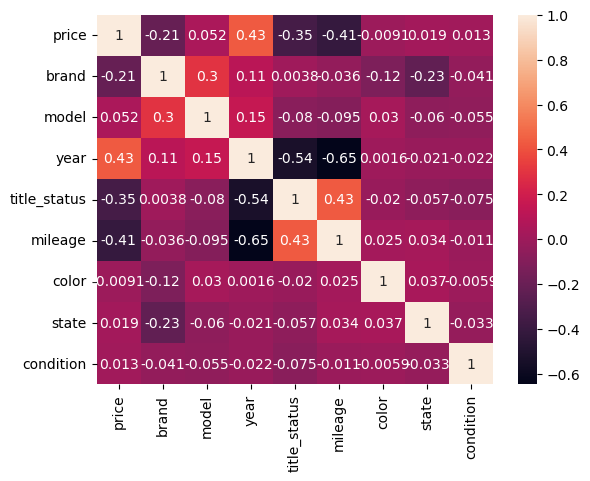

In [18]:
dataplot= sns.heatmap(data.corr(),annot= True)
plt.show()

# **Building and Evaluating**

In [19]:
#Preparing data for modeling
from sklearn.model_selection import train_test_split  #for spliting the datasets

# Assume 'price' is the target variable you want to predict
X = data.drop('price', axis=1) #All columns except 'price' are selected as features.
y = data['price']  #The 'price' column is selected as the target variable.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.svm import SVR

# Initialize the model
svm_model = SVR()  # SVR is a type of Support Vector Machine (SVM) specifically designed for regression tasks.

# Train the model
svm_model.fit(X_train, y_train)


SVR()

In [21]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#MSE measures the average squared difference between the actual and predicted values.
#R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 172504718.23871398
R-squared: -0.009598060397816077


# MSE: This high value indicates that, on average, the squared differences between the actual car prices and the predicted car prices are quite large.
# R² : -0.0096 indicates that the model does worse than simply predicting the average price for all cars, meaning it captures none of the variability in car prices and might even be misleading.


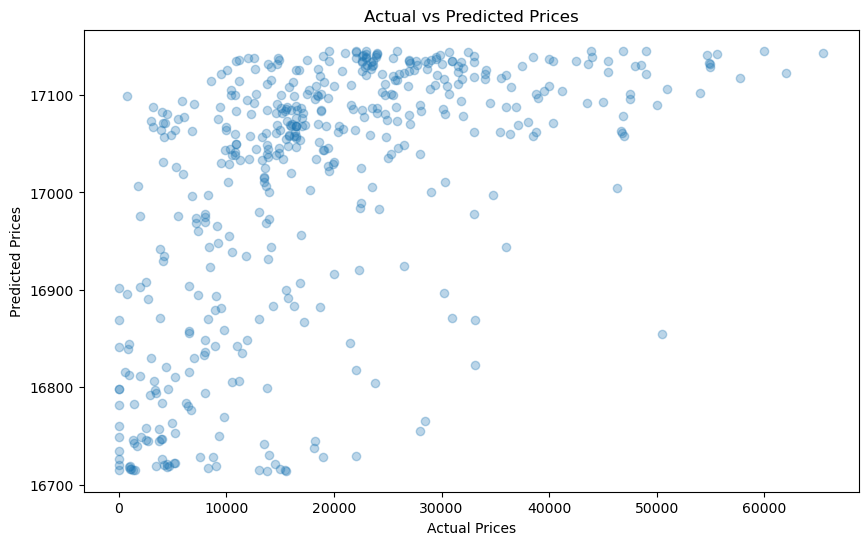

In [23]:
#Visualizing the actual vs. predicted prices to provide a visual understanding of the model's performance.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
